# Lab9 - Initial batch selection

In this lab session we will focus on initial batch selection, i.e. algorithms that allow us to bootstrap the active learning cycle.

Standard algorithm that we have used - random batch selection is highly nondeterministic, therefore obtained models after training vary in performance. In practical applications we have only one chance to choose the initial set to be labeled, therefore it can be problematic if we randomly sample the set of objects that leads to a poor model. This is why approaches with low variance are in high demand.

## We will be using kdd99 dataset in todays experiments.

See: http://kdd.ics.uci.edu/databases/kddcup99/task.html

0. Lets start with loading the data.

In [27]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('KDDCup99', return_X_y=True)
X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name kddcup99 exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,tcp,http,SF,181.0,5450.0,0,0.0,0.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,tcp,http,SF,239.0,486.0,0,0.0,0.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,tcp,http,SF,235.0,1337.0,0,0.0,0.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,tcp,http,SF,219.0,1337.0,0,0.0,0.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,tcp,http,SF,217.0,2032.0,0,0.0,0.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


Classes: ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster'], 
 number of objects in each class: [  2203     30      8     53     12   1247     21      9      7 107201
    231  97277      3      4    264   1040     10   1589 280790      2
    979   1020     20] 
 Dataset shape: (494020, 41)


(array([9.73160e+04, 1.07204e+05, 2.80843e+05, 1.24300e+03, 2.28700e+03,
        2.23200e+03, 1.60100e+03, 2.35000e+02, 2.70000e+01, 1.03200e+03]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

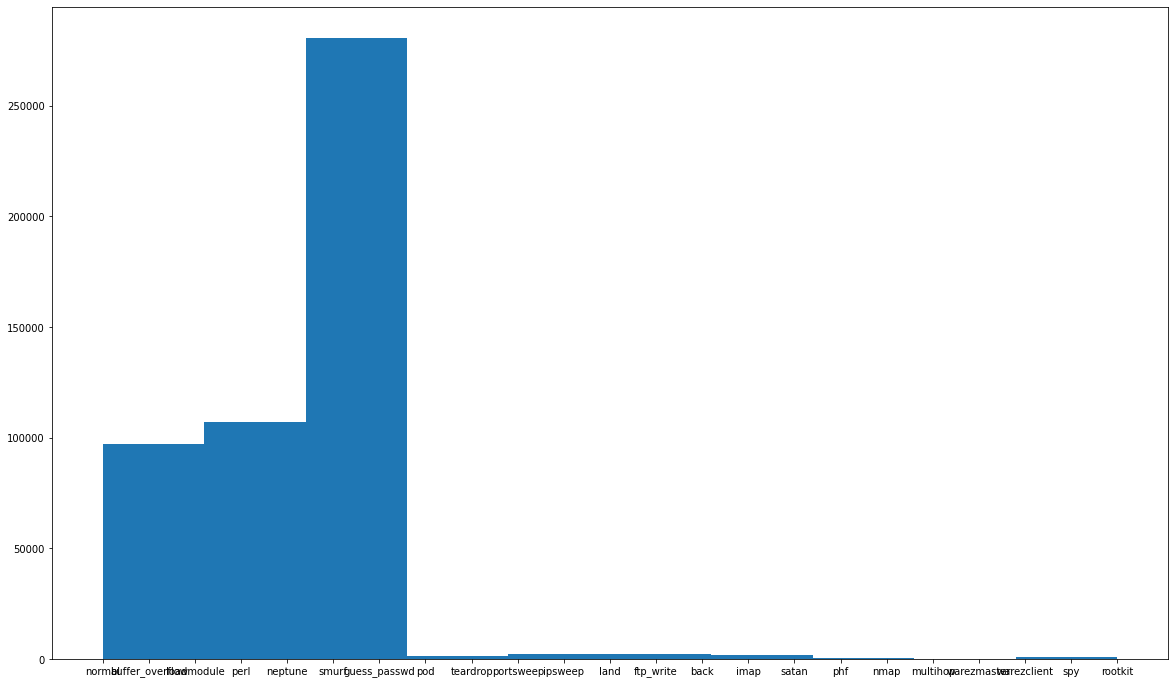

In [29]:
import matplotlib.pyplot as plt
import numpy as np

y_unique, y_counts = np.unique(y, return_counts=True)
print(f"Classes: {y_unique}, \n Number of objects in each class: {y_counts}, \n Dataset shape: {X.shape}")
plt.figure(figsize=(20, 12))
plt.hist(y)

1. Split the data into pool and test.

2. Preprocess the data in a way that it can be used by logistic regression and kmeans algorithm.

3. Randomly sample the initial dataset with size 1% of the pool data. \
Create a logistic regression model and train on sampled data. \
Compute the BAC of the model on the test set. \
Repeat 100 times and draw the histogram of results.



3. Create a kmeans algorithm, cluster the dataset into size of initial batch clusters, choose one sample from each cluster at random. \
Compute BAC of the model trained on chosen sampels. \
Add it as a vertical line to the previous visualization.

4. Find the centroids of the clusters from the point 3, use them instead of random points in your initial batch selection algorithm.

5.* Use another clustering alogrithm and check its performance.